In [1]:
from class_fit_Texp import * 

In [2]:
#### METADATA

t_koichi_disco        = 2460084.22725694
# zero_flux = 2.5e-10

In [3]:
table = ascii.read('SN2023ixf_lcs_visible.csv')

In [4]:
table.colnames

['JD', 'mag', 'magerr', 'source', 'filter']

In [5]:

#DK ND DK: 
# JD = 2460082.7516+0.085-2460084.2272569444, m >21.86 
table.add_row([2460082.8366,21.8,99.99,'DK','clear?'])


In [6]:
table['t_fromfd'] = table['JD']- t_koichi_disco

In [7]:
# table[table['t_fromfd']<=0.1]

In [8]:
table = table[table['filter']!='g']

In [9]:
phot_to_fit = table['t_fromfd', 'mag', 'magerr']

In [10]:
phot_to_fit.remove_row(0)

In [11]:
phot_to_fit['magerr'][phot_to_fit['magerr']==99.99] = 0.9


In [12]:
phot_to_fit.sort('t_fromfd')

In [13]:
phot_to_fit

t_fromfd,mag,magerr
float64,float64,float64
-1.3906569401733577,21.8,0.9
-0.9135575601831079,18.7577082061412,0.237929243095753
-0.9085730602964759,18.780951487928,0.222793483759511
-0.9034644700586796,18.4024899698843,0.184969732470276
-0.8983915303833783,18.7932011466272,0.237136369456759
-0.8934380202554166,18.2823084705039,0.175643413720649
-0.8885048599913716,18.2131034816067,0.200537407659775
-0.8835273501463234,18.4002204859245,0.18602899042277
-0.8783723004162312,18.4153190496848,0.176723762590261


<ErrorbarContainer object of 3 artists>

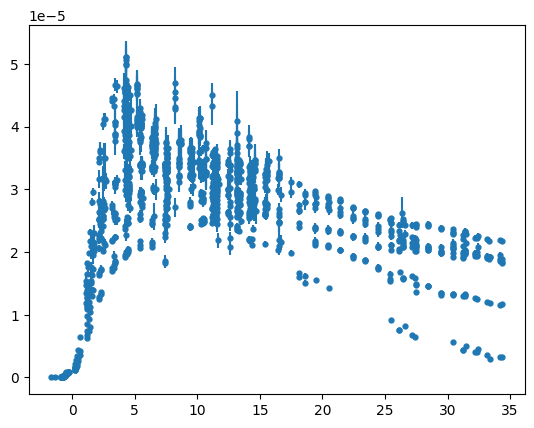

In [13]:
plt.figure()
plt.errorbar(phot_to_fit['t_fromfd'],to_flux(phot_to_fit['mag']),
             error_onflux_from_mag(phot_to_fit['mag'],phot_to_fit['magerr']),
             fmt = 'o', ms=3.5  )


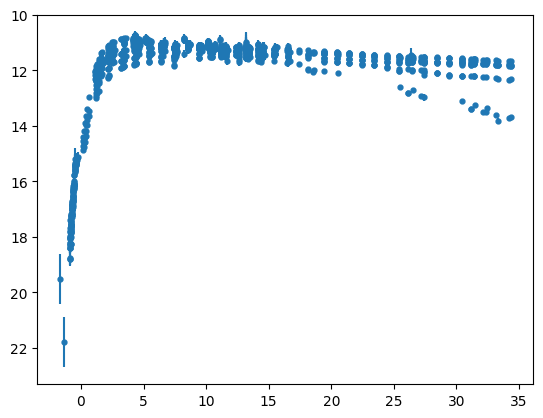

In [14]:
plt.errorbar(phot_to_fit['t_fromfd'],phot_to_fit['mag'],
            phot_to_fit['magerr'],
             fmt = 'o', ms=3.5  )

plt.gca().invert_yaxis()

# Using the last ND (of Kenedy) as the zero point

In [14]:

## Fitting only Phase 1

guess = [2e-6, -1.2 , 3]
bound = {'a': [0,np.inf], 't_exp':[-3,-0.9], 'n':[1,5]} 


explo_fit_flux_fbrise = Fit_t_exp_flux(table=phot_to_fit, min_fit=-1, max_fit=-0.5, mini = -2, maxi = 0.,
                                      zero_point = 21.8)
explo_fit_flux_fbrise.fit_minuit(guess, bound)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.898                      │              Nfcn = 203              │
│ EDM = 2.46e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

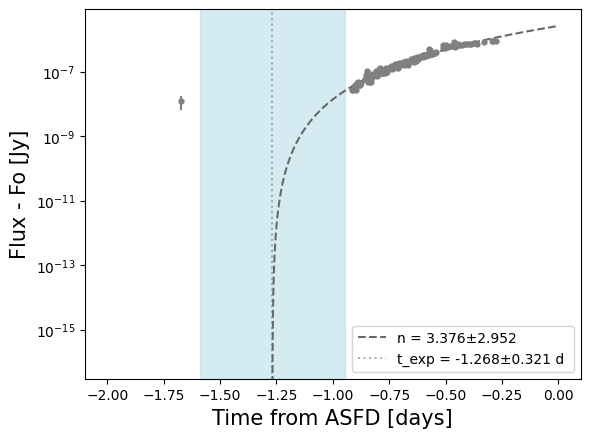

In [57]:
explo_fit_flux_fbrise.plot_fit(scale = 'log')

In [58]:
to_flux(21.8)

1.9054607179632444e-09

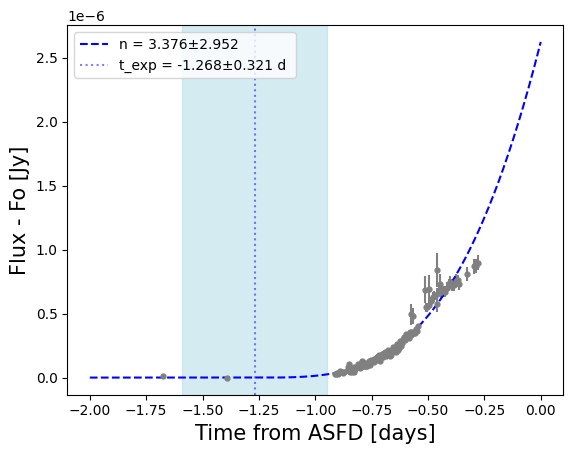

In [59]:
explo_fit_flux_fbrise.plot_fit()

In [15]:
## Including Phase 1 and Phase 2

guess = [2e-6, -1.2 , 3]
bound = {'a': [0,np.inf], 't_exp':[-3,-0.9], 'n':[0,5]} 


explo_fit_flux_fullrise = Fit_t_exp_flux(table=phot_to_fit, min_fit=-1, max_fit=-0., mini = -2, maxi = 0.,
                                        zero_point=21.8)
explo_fit_flux_fullrise.fit_minuit(guess, bound)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.084                      │              Nfcn = 99               │
│ EDM = 3e-05 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

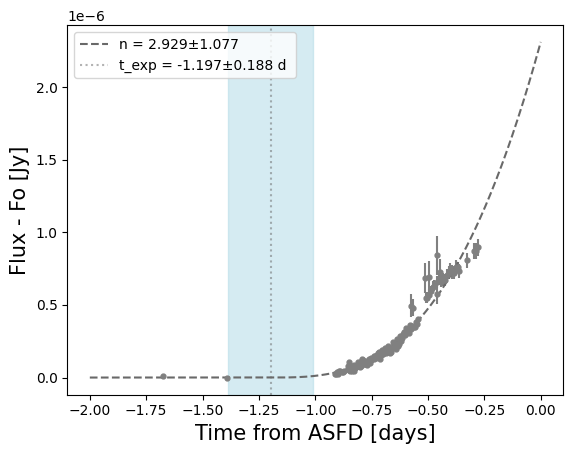

In [61]:
explo_fit_flux_fullrise.plot_fit()

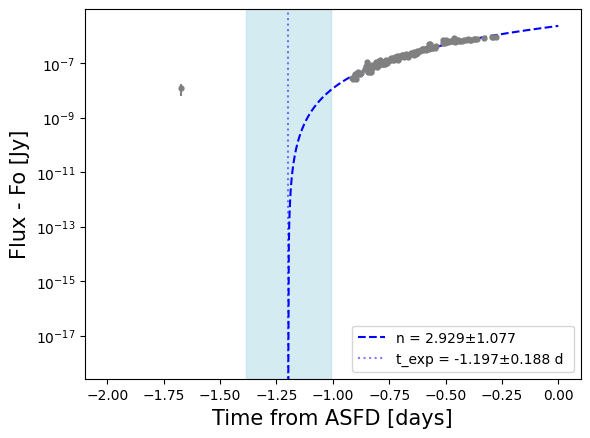

In [62]:
explo_fit_flux_fullrise.plot_fit(scale='log')

2460082.958949683
2460083.0299857245


/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/SN2023ixf/explosiontime_estimation/library_funciton_fitTexp.py:57: RuntimeWarning: invalid value encountered in power
  hiuv = np.where( jd-t_exp > 0, a*((jd-t_exp)**n) , 0 )


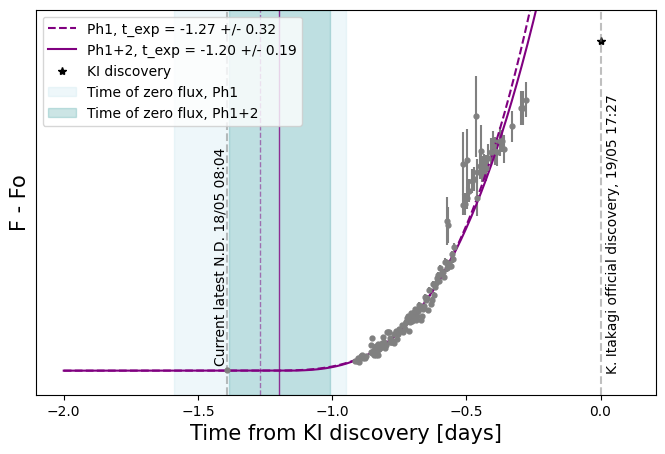

In [16]:
#### SUMMARY PLOT WITH KENNEDY AS ZERO POINT

plot_phot = phot_to_fit[phot_to_fit['t_fromfd']<=0.1]

x_ = np.linspace(-2, 0.1, 1000)
        
_params_fit1 = [explo_fit_flux_fbrise.minuit_output.params[x].value for x in range(3)]
_errors_fit1 = [explo_fit_flux_fbrise.minuit_output.params[x].error for x in range(3)]

_params_fit2 = [explo_fit_flux_fullrise.minuit_output.params[x].value for x in range(3)]
_errors_fit2 = [explo_fit_flux_fullrise.minuit_output.params[x].error for x in range(3)]




# t_ , fit, e_fit = self.error_propag(returnop=True)
tx_string1 = f't_exp = {_params_fit1[1]:.3f}±{_errors_fit1[1]:.3f} d '
tx_string2 = f't_exp = {_params_fit2[1]:.3f}±{_errors_fit2[1]:.3f} d '


plt.figure(figsize = (8,5))
plt.errorbar(plot_phot['t_fromfd'], 
             to_flux(plot_phot['mag']), 
             error_onflux_from_mag(plot_phot['mag'],plot_phot['magerr']), fmt = 'o', ms=3.5 , color = 'grey' )


# FIT 1 taking into account the first bloc only
plt.plot(x_ , rise_typeII(x_, *_params_fit1), ls = '--' , label= f'Ph1, t_exp = {_params_fit1[1]:.2f} +/- {_errors_fit1[1]:.2f}'  , 
         color = 'purple' )



# FIT 2 taking into account the photometry prior to KI 


# FIT 1 taking into account the first bloc only
plt.plot(x_ , rise_typeII(x_, *_params_fit2), ls = '-' , label= f'Ph1+2, t_exp = {_params_fit2[1]:.2f} +/- {_errors_fit2[1]:.2f}'  , 
         color = 'purple' )


### KOICHI ITAKAGI 

# t_koichi_disco        = 60083.72725694

plt.plot(0 , to_flux(14.9), marker = '*' , lw = 0,color = 'black', label = 'KI discovery' )
plt.axvline(0, color = 'grey' ,ls='--',alpha = 0.5 )
plt.text(0.02,0.0e-6,'K. Itakagi official discovery, 19/05 17:27 ', rotation=90 )


#### explosion estimate
##fit1
plt.axvline(_params_fit1[1], color = 'purple' ,ls='--',alpha = 0.5, lw = 1 )
plt.axvspan(_params_fit1[1]-_errors_fit1[1],_params_fit1[1]+_errors_fit1[1],
            color = 'lightblue', alpha = 0.2, label = 'Time of zero flux, Ph1')
##fit2
plt.axvline(_params_fit2[1], color = 'purple' ,ls='-',alpha = 0.8, lw = 1  )
plt.axvspan(_params_fit2[1]-_errors_fit2[1],_params_fit2[1]+_errors_fit2[1],
            color = 'teal', alpha = 0.2, label = 'Time of zero flux, Ph1+2')


# T_exp = (_params_fit1[1]+_params_fit2[1])/2
# print(T_exp+t_koichi_disco)
# print(_params_fit1[1]-T_exp)
# plt.axvline((_params_fit1[1]+_params_fit2[1])/2, color = 'black' ,ls='-',alpha = 0.5, lw = 0.8  )
# plt.text(T_exp+0.05, 0.025e-6, 
#          'Estimated explosion time at 18/05 11:53', color = 'black', rotation=90)



print(t_koichi_disco+_params_fit1[1])
print(t_koichi_disco+_params_fit2[1])




plt.axvline(2460082.8366-t_koichi_disco, color = 'grey' ,ls='--',alpha = 0.52 )
plt.text(2460082.8366 - t_koichi_disco-0.05, 0.025e-6, 
         'Current latest N.D. 18/05 08:04', color = 'black', rotation=90)


plt.xlabel('Time from KI discovery [days]', size = 15)
plt.ylabel('F - Fo', size = 15)
plt.yticks([])

plt.ylim([-8e-8, 1.2e-6])

plt.legend()

# Using the progenitor level as the zero point

In [25]:

## Fitting only Phase 1

guess = [2e-6, -1.2 , 3]
bound = {'a': [0,np.inf], 't_exp':[-3,-0.9], 'n':[1,5]} 


explo_fit_flux_fbrise = Fit_t_exp_flux(table=phot_to_fit, min_fit=-1, max_fit=-0.5, mini = -2, maxi = 0.,
                                      zero_point = 25)
explo_fit_flux_fbrise.fit_minuit(guess, bound)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.898                      │              Nfcn = 203              │
│ EDM = 2.46e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/SN2023ixf/explosiontime_estimation/library_funciton_fitTexp.py:57: RuntimeWarning: invalid value encountered in power
  hiuv = np.where( jd-t_exp > 0, a*((jd-t_exp)**n) , 0 )


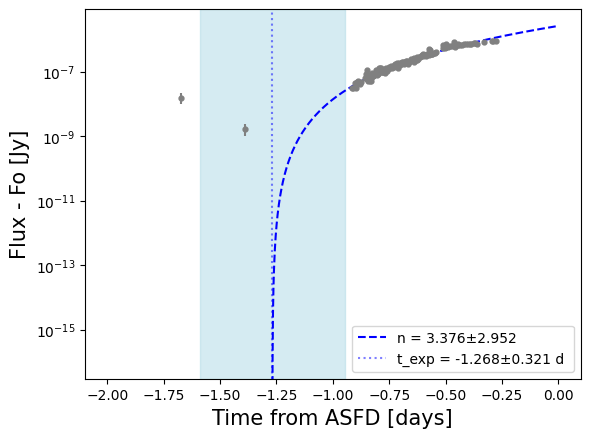

In [26]:
explo_fit_flux_fbrise.plot_fit(scale = 'log')

In [17]:
to_flux(21.8)

1.9054607179632444e-09

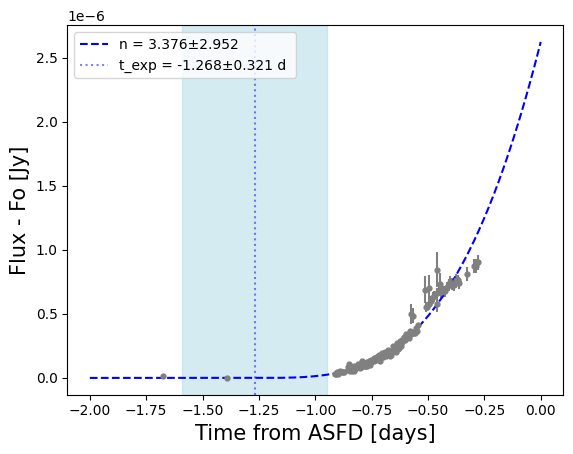

In [27]:
explo_fit_flux_fbrise.plot_fit()

In [28]:
## Including Phase 1 and Phase 2

guess = [2e-6, -1.2 , 3]
bound = {'a': [0,np.inf], 't_exp':[-3,-0.9], 'n':[0,5]} 


explo_fit_flux_fullrise = Fit_t_exp_flux(table=phot_to_fit, min_fit=-1, max_fit=-0., mini = -2, maxi = 0.,
                                        zero_point=25)
explo_fit_flux_fullrise.fit_minuit(guess, bound)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.084                      │              Nfcn = 99               │
│ EDM = 3e-05 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

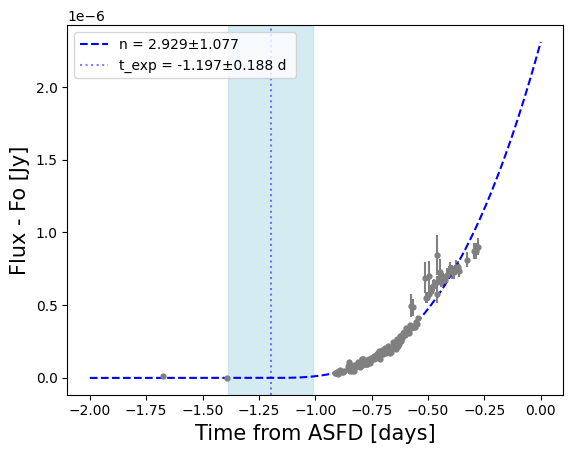

In [29]:
explo_fit_flux_fullrise.plot_fit()

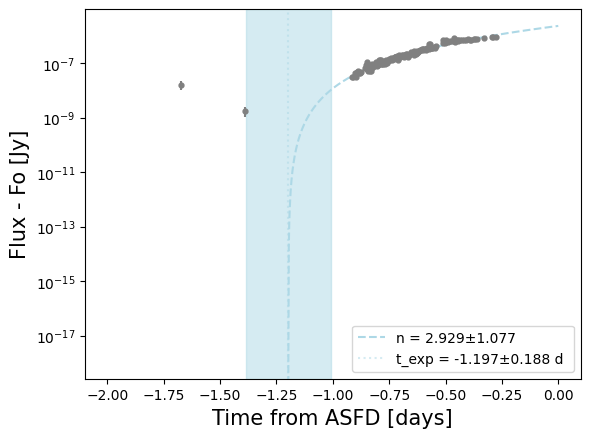

In [30]:
explo_fit_flux_fullrise.plot_fit(scale='log')

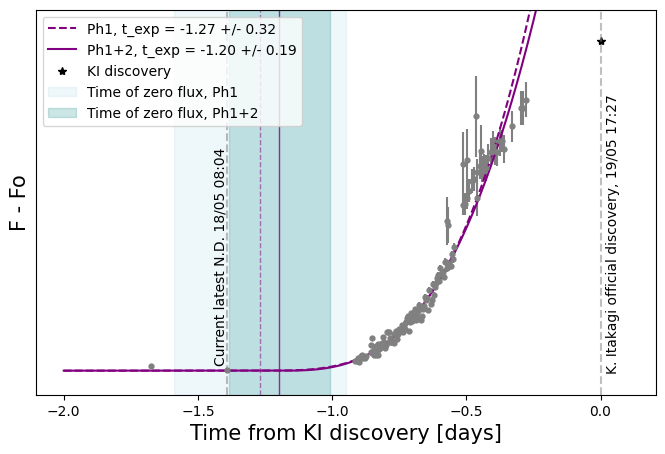

In [55]:
#### SUMMARY PLOT WITH ZERO POINT AS PROGENITOR 

plot_phot = phot_to_fit[phot_to_fit['t_fromfd']<=0.1]

x_ = np.linspace(-2, 0.1, 1000)
        
_params_fit1 = [explo_fit_flux_fbrise.minuit_output.params[x].value for x in range(3)]
_errors_fit1 = [explo_fit_flux_fbrise.minuit_output.params[x].error for x in range(3)]

_params_fit2 = [explo_fit_flux_fullrise.minuit_output.params[x].value for x in range(3)]
_errors_fit2 = [explo_fit_flux_fullrise.minuit_output.params[x].error for x in range(3)]




# t_ , fit, e_fit = self.error_propag(returnop=True)
tx_string1 = f't_exp = {_params_fit1[1]:.3f}±{_errors_fit1[1]:.3f} d '
tx_string2 = f't_exp = {_params_fit2[1]:.3f}±{_errors_fit2[1]:.3f} d '


plt.figure(figsize = (8,5))
plt.errorbar(plot_phot['t_fromfd'], 
             to_flux(plot_phot['mag']), 
             error_onflux_from_mag(plot_phot['mag'],plot_phot['magerr']), fmt = 'o', ms=3.5 , color = 'grey' )


# FIT 1 taking into account the first bloc only
plt.plot(x_ , rise_typeII(x_, *_params_fit1), ls = '--' , label= f'Ph1, t_exp = {_params_fit1[1]:.2f} +/- {_errors_fit1[1]:.2f}'  , 
         color = 'purple' )



# FIT 2 taking into account the photometry prior to KI 


# FIT 1 taking into account the first bloc only
plt.plot(x_ , rise_typeII(x_, *_params_fit2), ls = '-' , label= f'Ph1+2, t_exp = {_params_fit2[1]:.2f} +/- {_errors_fit2[1]:.2f}'  , 
         color = 'purple' )


### KOICHI ITAKAGI 

# t_koichi_disco        = 60083.72725694

plt.plot(0 , to_flux(14.9), marker = '*' , lw = 0,color = 'black', label = 'KI discovery' )
plt.axvline(0, color = 'grey' ,ls='--',alpha = 0.5 )
plt.text(0.02,0.0e-6,'K. Itakagi official discovery, 19/05 17:27 ', rotation=90 )


#### explosion estimate
##fit1
plt.axvline(_params_fit1[1], color = 'purple' ,ls='--',alpha = 0.5, lw = 1 )
plt.axvspan(_params_fit1[1]-_errors_fit1[1],_params_fit1[1]+_errors_fit1[1],
            color = 'lightblue', alpha = 0.2, label = 'Time of zero flux, Ph1')
##fit2
plt.axvline(_params_fit2[1], color = 'purple' ,ls='-',alpha = 0.8, lw = 1  )
plt.axvspan(_params_fit2[1]-_errors_fit2[1],_params_fit2[1]+_errors_fit2[1],
            color = 'teal', alpha = 0.2, label = 'Time of zero flux, Ph1+2')


# T_exp = (_params_fit1[1]+_params_fit2[1])/2
# print(T_exp+t_koichi_disco)
# print(_params_fit1[1]-T_exp)
# plt.axvline((_params_fit1[1]+_params_fit2[1])/2, color = 'black' ,ls='-',alpha = 0.5, lw = 0.8  )
# plt.text(T_exp+0.05, 0.025e-6, 
#          'Estimated explosion time at 18/05 11:53', color = 'black', rotation=90)








plt.axvline(2460082.8366-t_koichi_disco, color = 'grey' ,ls='--',alpha = 0.52 )
plt.text(2460082.8366 - t_koichi_disco-0.05, 0.025e-6, 
         'Current latest N.D. 18/05 08:04', color = 'black', rotation=90)


plt.xlabel('Time from KI discovery [days]', size = 15)
plt.ylabel('F - Fo', size = 15)
plt.yticks([])

plt.ylim([-8e-8, 1.2e-6])

plt.legend()

2460082.958949683
2460083.0299857245


/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/SN2023ixf/explosiontime_estimation/library_funciton_fitTexp.py:57: RuntimeWarning: invalid value encountered in power
  hiuv = np.where( jd-t_exp > 0, a*((jd-t_exp)**n) , 0 )


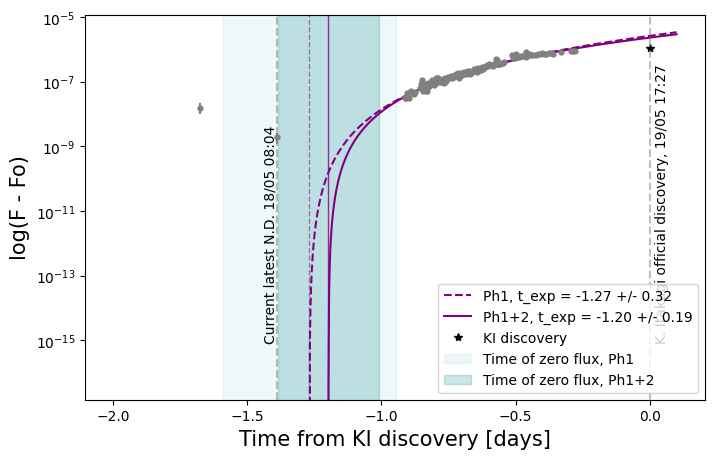

In [50]:
#### SUMMARY PLOT WITH ZERO POINT AS PROGENITOR 

plot_phot = phot_to_fit[phot_to_fit['t_fromfd']<=0.1]

x_ = np.linspace(-2, 0.1, 1000)
        
_params_fit1 = [explo_fit_flux_fbrise.minuit_output.params[x].value for x in range(3)]
_errors_fit1 = [explo_fit_flux_fbrise.minuit_output.params[x].error for x in range(3)]

_params_fit2 = [explo_fit_flux_fullrise.minuit_output.params[x].value for x in range(3)]
_errors_fit2 = [explo_fit_flux_fullrise.minuit_output.params[x].error for x in range(3)]




# t_ , fit, e_fit = self.error_propag(returnop=True)
tx_string1 = f't_exp = {_params_fit1[1]:.3f}±{_errors_fit1[1]:.3f} d '
tx_string2 = f't_exp = {_params_fit2[1]:.3f}±{_errors_fit2[1]:.3f} d '


plt.figure(figsize = (8,5))
plt.errorbar(plot_phot['t_fromfd'], 
             to_flux(plot_phot['mag']), 
             error_onflux_from_mag(plot_phot['mag'],plot_phot['magerr']), fmt = 'o', ms=3.5 , color = 'grey' )


# FIT 1 taking into account the first bloc only
plt.plot(x_ , rise_typeII(x_, *_params_fit1), ls = '--' , label= f'Ph1, t_exp = {_params_fit1[1]:.2f} +/- {_errors_fit1[1]:.2f}' 
         , color = 'purple' )

print(t_koichi_disco+_params_fit1[1])
print(t_koichi_disco+_params_fit2[1])

# FIT 2 taking into account the photometry prior to KI 


# FIT 1 taking into account the first bloc only
plt.plot(x_ , rise_typeII(x_, *_params_fit2), ls = '-' , label= f'Ph1+2, t_exp = {_params_fit2[1]:.2f} +/- {_errors_fit2[1]:.2f}', 
         color = 'purple' )


### KOICHI ITAKAGI 

# t_koichi_disco        = 60083.72725694

plt.plot(0 , to_flux(14.9), marker = '*' ,lw = 0 ,color = 'black',label = 'KI discovery' )
plt.axvline(0, color = 'grey' ,ls='--',alpha = 0.5 )
plt.text(0.02,10**-15,'K. Itakagi official discovery, 19/05 17:27 ', rotation=90 )


#### explosion estimate
##fit1
plt.axvline(_params_fit1[1], color = 'purple' ,ls='--',alpha = 0.5, lw = 1 )
plt.axvspan(_params_fit1[1]-_errors_fit1[1],_params_fit1[1]+_errors_fit1[1],
            color = 'lightblue', alpha = 0.2, label = 'Time of zero flux, Ph1')
##fit2
plt.axvline(_params_fit2[1], color = 'purple' ,ls='-',alpha = 0.8, lw = 1  )
plt.axvspan(_params_fit2[1]-_errors_fit2[1],_params_fit2[1]+_errors_fit2[1],
            color = 'teal', alpha = 0.2, label = 'Time of zero flux, Ph1+2')


# T_exp = (_params_fit1[1]+_params_fit2[1])/2
# print(T_exp+t_koichi_disco)
# print(_params_fit1[1]-T_exp)
# plt.axvline((_params_fit1[1]+_params_fit2[1])/2, color = 'black' ,ls='-',alpha = 0.5, lw = 0.8  )
# plt.text(T_exp+0.05, 0.025e-6, 
#          'Estimated explosion time at 18/05 11:53', color = 'black', rotation=90)








plt.axvline(2460082.8366-t_koichi_disco, color = 'grey' ,ls='--',alpha = 0.52 )
plt.text(2460082.8366 - t_koichi_disco-0.05, 10**-15, 
         'Current latest N.D. 18/05 08:04', color = 'black', rotation=90)


plt.xlabel('Time from KI discovery [days]', size = 15)
plt.ylabel('log(F - Fo)', size = 15)
plt.yticks([])

# plt.ylim([-8e-8, 1.2e-6])
plt.yscale('log')

plt.legend()

In [53]:
table.show_in_notebook()

idx,JD,mag,magerr,source,filter,t_fromfd
0,2460082.5517,19.499,99.99,NH,CR,-1.6755569400265813
1,2460083.3883,17.826,0.183,NH,CR,-0.8389569399878383
2,2460083.4051,17.813,0.168,NH,CR,-0.8221569401212037
3,2460083.4427,17.556,0.195,NH,CR,-0.7845569401979446
4,2460083.5239,16.942,0.117,NH,CR,-0.7033569402992725
5,2460083.6539,15.757,0.401,SL,CR,-0.5733569404110312
6,2460083.6591,15.786,0.303,SL,CR,-0.5681569403968751
7,2460083.714,15.405,0.382,SL,CR,-0.5132569400593638
8,2460083.7299,15.389,0.373,SL,CR,-0.49735694006085396
9,2460083.765,15.182,0.398,SL,CR,-0.4622569400817156


In [20]:
# from matplotlib import rc

# rc('font', **{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

# plt.rcParams['xtick.labelsize']=18
# plt.rcParams['ytick.labelsize']=18



In [21]:
np.sqrt(0.3**2+0.19**2)

0.35510561809129404

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.664                      │              Nfcn = 487              │
│ EDM = 0.000117 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

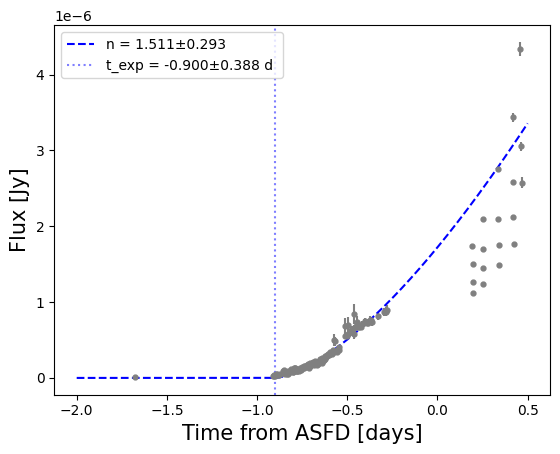

In [14]:
guess = [2e-7, -1 , 0.45]
bound = {'a': [0,np.inf], 't_exp':[-3,-0.9], 'n':[0,5]} 


explo_fit_flux = Fit_t_exp_flux(table=phot_to_fit, min_fit=-0.55, max_fit=0., mini = -2, maxi = 0.5)

explo_fit_flux.fit_minuit(guess, bound)
explo_fit_flux.plot_fit()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.089                      │              Nfcn = 253              │
│ EDM = 4.77e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

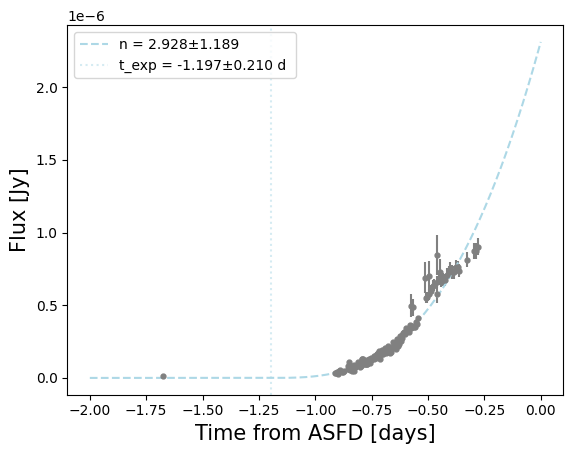

In [16]:
guess = [2e-7, -1 , 0.45]
bound = {'a': [0,np.inf], 't_exp':[-3,-0.9], 'n':[0,5]} 


explo_fit_flux = Fit_t_exp_flux(table=phot_to_fit, min_fit=-2, max_fit=0., mini = -2, maxi = 0.)

explo_fit_flux.fit_minuit(guess, bound)
explo_fit_flux.plot_fit()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.898                      │              Nfcn = 264              │
│ EDM = 7.67e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

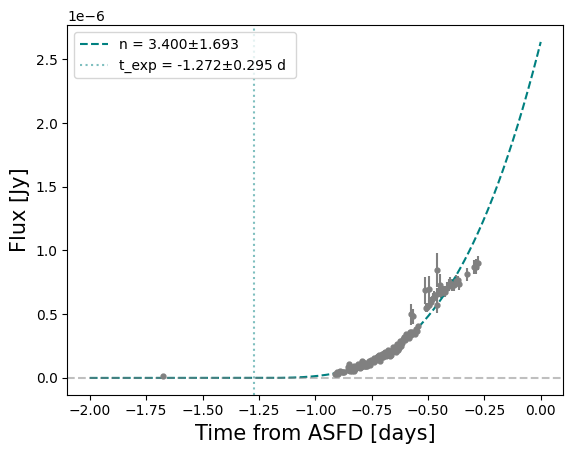

In [22]:
guess = [1e-6, -1.5 , 3]
bound = {'a': [0,np.inf], 't_exp':[-3,-0.9], 'n':[0,5]} 


explo_fit_flux = Fit_t_exp_flux(table=phot_to_fit, min_fit=-1.5, max_fit=-0.5, mini = -2, maxi = 0.)

explo_fit_flux.fit_minuit(guess, bound)
explo_fit_flux.plot_fit()
plt.axhline(0, ls='--',color = 'grey', alpha = 0.5)

## plot two fits with only the early bunch and the whole amateur


In [ ]:
_colors  = ['blue', 'teal', 'lightblue', 'dimgrey','rebeccapurple']
_fitcolor = random.choice(_colors)


x_ = np.linspace(self._minifitplot, self._maxifitplot, 1000)

_params = [self.minuit_output.params[x].value for x in range(3)]
_errors = [self.minuit_output.params[x].error for x in range(3)]



# t_ , fit, e_fit = self.error_propag(returnop=True)

tx_string = f't_exp = {_params[1]:.3f}±{_errors[1]:.3f} d '
n_string  = f'n = {_params[2]:.3f}±{_errors[2]:.3f} '


plt.figure()
plt.errorbar(self.t, self.f, self.e_f, fmt = 'o', ms=3.5 , color = 'grey' )
plt.plot(x_ , rise_typeII(x_, *_params), ls = '--' , label= n_string , color = _fitcolor )

# plt.plot(x_[0] , rise_typeII(x_, *_params)[0], color = 'white',label= chi_string )
# plt.plot(x_[1] , rise_typeII(x_,*_params)[1], color = 'white',label= chi_fit_string )


plt.axvline(_params[1], color = _fitcolor ,ls=':',alpha = 0.5, label = tx_string )
# plt.axvspan(t_exp_ - dt_exp_, t_exp_ + dt_exp_, color = 'lightblue', alpha = 0.5)


plt.xlabel('Time from ASFD [days]', size = 15)
plt.ylabel('Flux [Jy]', size = 15)

plt.legend()

In [23]:
-1.272+t_koichi_disco

2460082.9552569403

In [15]:
phot_to_fit_mag = phot_to_fit[phot_to_fit['t_fromfd']<=1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.629                      │              Nfcn = 785              │
│ EDM = 0.000117 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

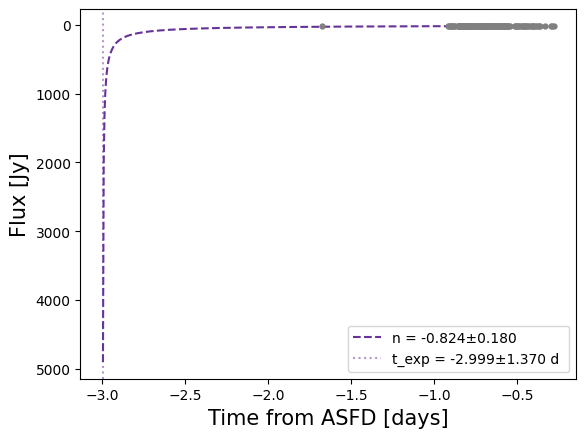

In [17]:
guess = [2, -2 , 0.5]
bound = { 't_exp':[-3,-0.9], 'n':[-10,10]} 


explo_fit_mag = Fit_t_exp_mag(table=phot_to_fit_mag, min_fit=-2, max_fit=-0.6, mini = -2, maxi = 0.)
explo_fit_mag.fit_minuit(guess, bound)
explo_fit_mag.plot_fit()